In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from ssnhl.util import load_data

In [2]:
def get_oobs(data_path, preprocess_func):
    X, y, _ = load_data(data_path, preprocess_func)
    targets = {
        "minor": {0: 0, 1: 1, 2: 1, 3: 1},
        "important": {0: 0, 1: 0, 2: 1, 3: 1},
        "full": {0: 0, 1: 0, 2: 0, 3: 1},
        "all": {0: 0, 1: 1, 2: 2, 3: 3},
    }

    oobs = {}
    for target in targets:
        _y = y.copy()
        target_map = targets[target]
        for origin_class in target_map:
            _y[_y == origin_class] = target_map[origin_class]

        _oobs = []
        for random_state in range(1, 51):
            clf = RandomForestClassifier(n_estimators=500, max_features=0.25, criterion='entropy', oob_score=True, random_state=random_state)
            clf.fit(X, _y)

            _oobs.append(1 - clf.oob_score_)
        oobs[target] = _oobs
    return pd.DataFrame(oobs)

oobs = get_oobs("../raw_data/all.xlsx", "miNNseq")
oobs

best k:  15


,minor,important,full,all
0,0.295000,0.281667,0.168333,0.400000
1,0.270000,0.283333,0.171667,0.385000
2,0.281667,0.281667,0.171667,0.406667
3,0.281667,0.295000,0.163333,0.398333
4,0.300000,0.293333,0.178333,0.385000
5,0.268333,0.291667,0.170000,0.386667
6,0.281667,0.288333,0.173333,0.393333
7,0.296667,0.290000,0.165000,0.395000
8,0.306667,0.283333,0.173333,0.395000
9,0.288333,0.285000,0.170000,0.403333


minor        0.286633
important    0.286800
full         0.168400
all          0.396933
dtype: float64

minor        0.009568
important    0.006519
full         0.004567
all          0.007217
dtype: float64

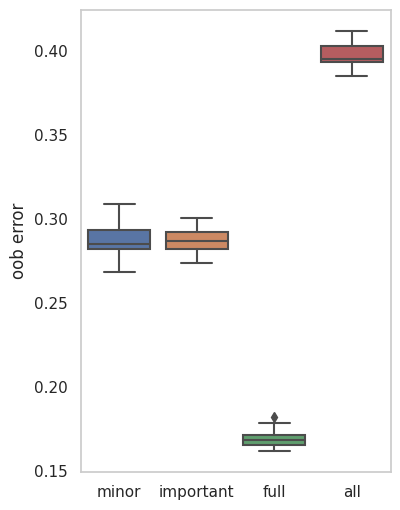

In [3]:
def boxplot(data, x=None, y=None, hue=None, order=None, xlabel=None, ylabel=None, xticklabels=None, output_path: str = None, figsize: tuple = (4, 6)):
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=figsize)

    ax = sns.boxplot(data=data, x=x, y=y, hue=hue, order=order)

    # plt.legend()
    plt.grid(False)

    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if xticklabels:
        ax.set_xticklabels(labels=xticklabels)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
    plt.show()

display(oobs.mean())
display(oobs.std())
boxplot(pd.melt(oobs), x="variable", y="value", xlabel="", ylabel="oob error", output_path="../output/miNNseq/RF_oob.pdf")